## Please use the Seoul Bike dataset. 

- What are the factors that influence the number of bikes rented? 
- Explore the data for outliers and missing values.
- Plot the correlation between the variables and state your comments
- Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.
- Coment on Model performance by using approapriate diagnostics and measures.

Good Luck!

In [1]:
import pandas as pd

In [2]:
Bike_Data=pd.read_csv("/Users/emani/Downloads/Projects/Linear_Regression_project/SeoulBikeData.csv")
Bike_Data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
print ('Dimension of Bike_Data:',Bike_Data.shape)

Dimension of Bike_Data: (8760, 14)


In [5]:
Bike_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [6]:
Bike_Data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
miss_val=Bike_Data.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [11]:
cat_cols=Bike_Data.select_dtypes(include="object")
cat_cols.head()

,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes


In [9]:
Bike_Data_num = Bike_Data.select_dtypes(include=['float64','int64'])
Bike_Data_num.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


Text(0.5, 1.0, 'Temperature distribution')

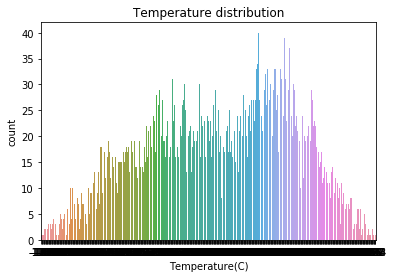

In [10]:
sns.countplot('Temperature(C)',data = Bike_Data)
plt.title("Temperature distribution")

In [12]:
for colname in cat_cols.columns:
    print(cat_cols[colname].value_counts())

17/11/2018    24
08/04/2018    24
02/08/2018    24
27/01/2018    24
04/10/2018    24
              ..
08/06/2018    24
31/05/2018    24
26/07/2018    24
08/11/2018    24
30/09/2018    24
Name: Date, Length: 365, dtype: int64
Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder

for colname in cat_cols.columns:
    le = LabelEncoder()
    Bike_Data[colname] = le.fit_transform(cat_cols[colname])

Bike_Data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,11,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,11,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,11,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,11,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,11,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [16]:
corr = Bike_Data.corr()
corr

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,1.000000,0.026532,0.000000e+00,0.022461,-0.024660,-0.037084,-0.099690,0.007795,-0.004143,-0.001126,0.103662,-1.745374e-02,0.003362,0.069037
Rented Bike Count,0.026532,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,-2.530575e-01,0.072338,0.203943
Hour,0.000000,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,9.516382e-18,0.000000,0.005439
Temperature(C),0.022461,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-3.352067e-01,0.055931,-0.050170
Humidity(%),-0.024660,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-1.203104e-01,0.050278,-0.020800
Wind speed (m/s),-0.037084,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,1.089520e-01,-0.023017,0.005037
Visibility (10m),-0.099690,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.477622e-02,-0.031773,-0.026000
Dew point temperature(C),0.007795,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-3.290270e-01,0.066759,-0.052837
Solar Radiation (MJ/m2),-0.004143,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-7.581168e-02,0.005077,-0.007665
Rainfall(mm),-0.001126,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.929617e-02,0.014269,0.002055


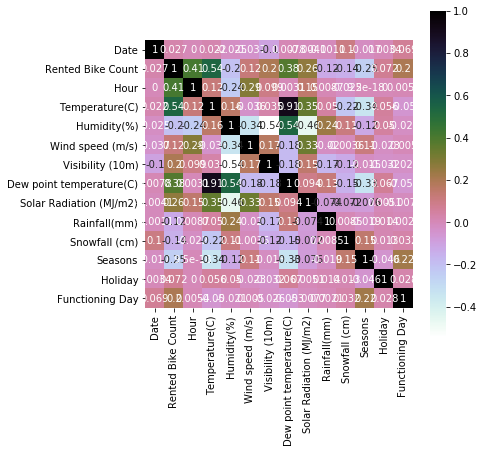

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [18]:
abs(corr['Temperature(C)'])[:-1].sort_values(ascending = False)

Temperature(C)              1.000000
Dew point temperature(C)    0.912798
Rented Bike Count           0.538558
Solar Radiation (MJ/m2)     0.353505
Seasons                     0.335207
Snowfall (cm)               0.218405
Humidity(%)                 0.159371
Hour                        0.124114
Holiday                     0.055931
Rainfall(mm)                0.050282
Wind speed (m/s)            0.036252
Visibility (10m)            0.034794
Date                        0.022461
Name: Temperature(C), dtype: float64

In [61]:
Bike_Data_x = Bike_Data.drop(['Date','Rented Bike Count'], axis = 1)
Bike_Data_y = Bike_Data['Rented Bike Count']             

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Bike_Data_x, Bike_Data_y, test_size=0.20)

In [63]:
print('Dimension of Bike_Data_x :',Bike_Data_x.shape)
print('Dimension of Bike_Data_y :',Bike_Data_y.shape)

Dimension of Bike_Data_x : (8760, 12)
Dimension of Bike_Data_y : (8760,)


In [64]:
Bike_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   int64  
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   int64  
 12  Holiday                   8760 non-null   int64  
 13  Functioning Day           8760 non-null   int64  
dtypes: float

In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train, y_train)

In [66]:
predictions = model.predict(X_train)
len(predictions)

7008

In [67]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_train, predictions)
print(accuracy)

0.5467782795122014


In [68]:
test_pred = model.predict(X_test)
r2_score(y_test, test_pred)

0.5584219241319863